# Analyze test data in R

In [44]:
library(here)
library(tidyverse)
setwd(here("test", "Summary_Stats_PostFilter"))

Rows: 35 Columns: 3
── Column specificati
Delimiter: "\t"
chr (1): chr
dbl (2): pos, qual

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


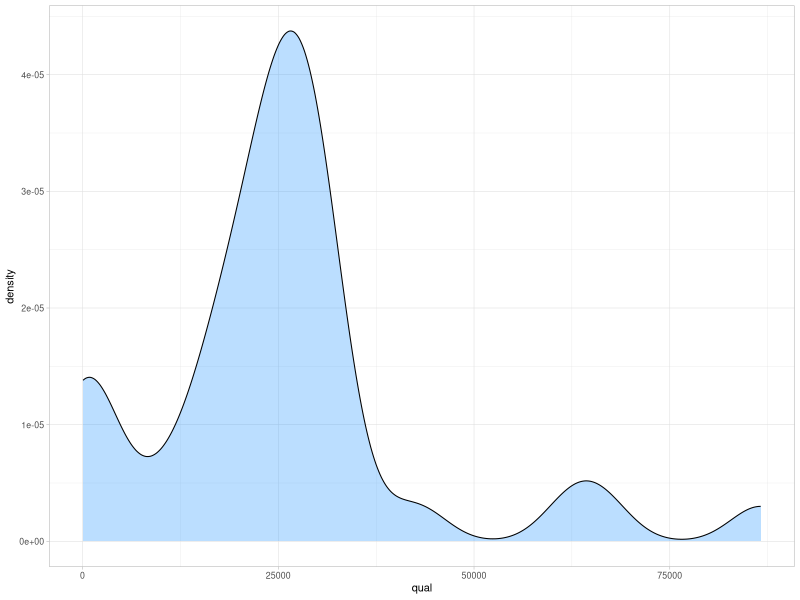

     chr           
 Length:35         
 Class :character  
 Mode  :character  
                   
                   
                   
      pos          
 Min.   : 1164179  
 1st Qu.:19463138  
 Median :36030281  
 Mean   :36223782  
 3rd Qu.:55197112  
 Max.   :68717945  
      qual         
 Min.   :   63.66  
 1st Qu.:17738.30  
 Median :24721.90  
 Mean   :25605.18  
 3rd Qu.:29255.35  
 Max.   :86604.90  

In [45]:
# Quality (Phred scores)
var_qual <- read_delim(
  "ProjTaxa_Stats.lqual",
  delim = "\t",
  col_names = c("chr", "pos", "qual"),
  skip = 1
)
ggplot(var_qual, aes(qual)) +
  geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3) +
  theme_light() #+
  # xlim(0, 6247.2)
summary(var_qual)

Rows: 35 Columns: 17
── Column specificati
Delimiter: "\t"
chr  (1): chr
dbl (16): pos, me...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


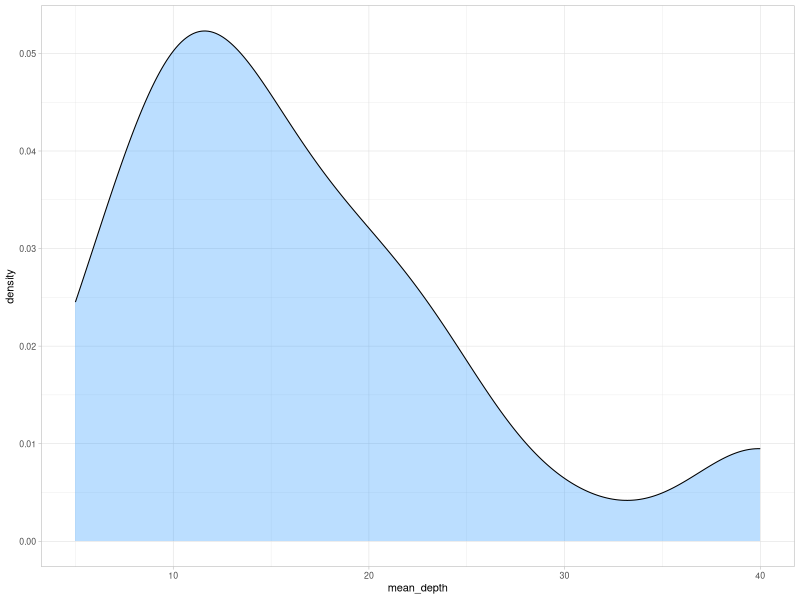

     chr           
 Length:35         
 Class :character  
 Mode  :character  
                   
                   
                   
      pos          
 Min.   : 1164179  
 1st Qu.:19463138  
 Median :36030281  
 Mean   :36223782  
 3rd Qu.:55197112  
 Max.   :68717945  
   mean_depth   
 Min.   : 5.00  
 1st Qu.:10.00  
 Median :13.00  
 Mean   :16.69  
 3rd Qu.:21.00  
 Max.   :40.00  
   var_depth    
 Min.   : 9.00  
 1st Qu.:13.50  
 Median :17.00  
 Mean   :21.29  
 3rd Qu.:22.00  
 Max.   :87.00  
       X5       
 Min.   : 4.00  
 1st Qu.:11.00  
 Median :15.00  
 Mean   :17.31  
 3rd Qu.:19.50  
 Max.   :53.00  
       X6       
 Min.   : 7.00  
 1st Qu.:11.00  
 Median :15.00  
 Mean   :18.57  
 3rd Qu.:23.00  
 Max.   :46.00  
       X7       
 Min.   : 8.00  
 1st Qu.:13.00  
 Median :17.00  
 Mean   :19.94  
 3rd Qu.:23.50  
 Max.   :53.00  
       X8       
 Min.   : 3.00  
 1st Qu.: 8.00  
 Median :15.00  
 Mean   :15.34  
 3rd Qu.:19.50  
 Max.   :37.00  
      

In [46]:
# Genotype depth (all genotype depths)
g_depth <- read_delim(
  "ProjTaxa_Stats.gdepth",
  delim = "\t",
  col_names = c("chr", "pos", "mean_depth", "var_depth"),
  skip = 1
)
ggplot(g_depth, aes(mean_depth)) +
  geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3) + 
  theme_light()
summary(g_depth)

Rows: 35 Columns: 4
── Column specificati
Delimiter: "\t"
chr (1): chr
dbl (3): pos, mea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


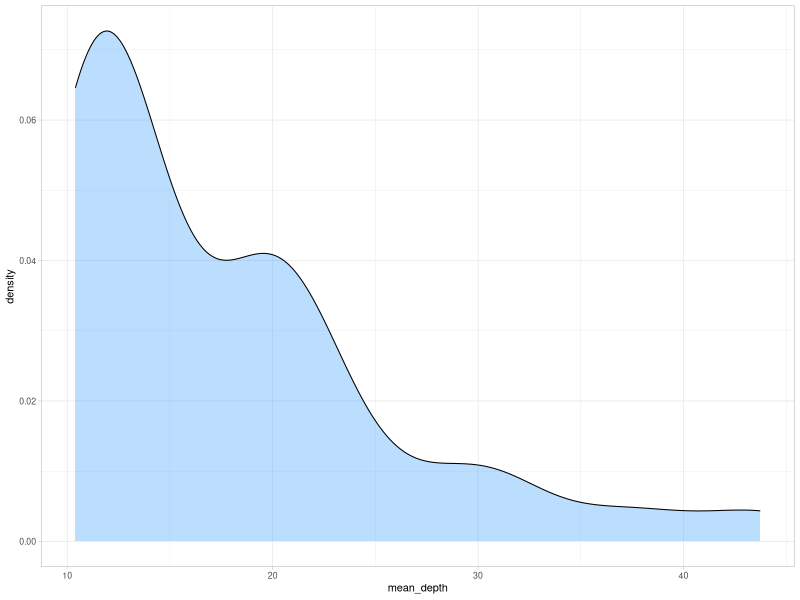

     chr           
 Length:35         
 Class :character  
 Mode  :character  
                   
                   
                   
      pos          
 Min.   : 1164179  
 1st Qu.:19463138  
 Median :36030281  
 Mean   :36223782  
 3rd Qu.:55197112  
 Max.   :68717945  
   mean_depth   
 Min.   :10.40  
 1st Qu.:11.53  
 Median :13.67  
 Mean   :17.66  
 3rd Qu.:20.17  
 Max.   :43.73  
   var_depth      
 Min.   :  5.543  
 1st Qu.: 11.810  
 Median : 14.952  
 Mean   : 50.024  
 3rd Qu.: 34.143  
 Max.   :436.924  

In [47]:
# Variant mean depth
var_depth <- read_delim(
  "ProjTaxa_Stats.ldepth.mean",
  delim = "\t",
  col_names = c("chr", "pos", "mean_depth", "var_depth"),
  skip = 1
)
ggplot(var_depth, aes(mean_depth)) +
  geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3) + 
  theme_light() #+
  # xlim(0, 50)
summary(var_depth)

Rows: 35 Columns: 6
── Column specificati
Delimiter: "\t"
chr (1): chr
dbl (5): pos, nch...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


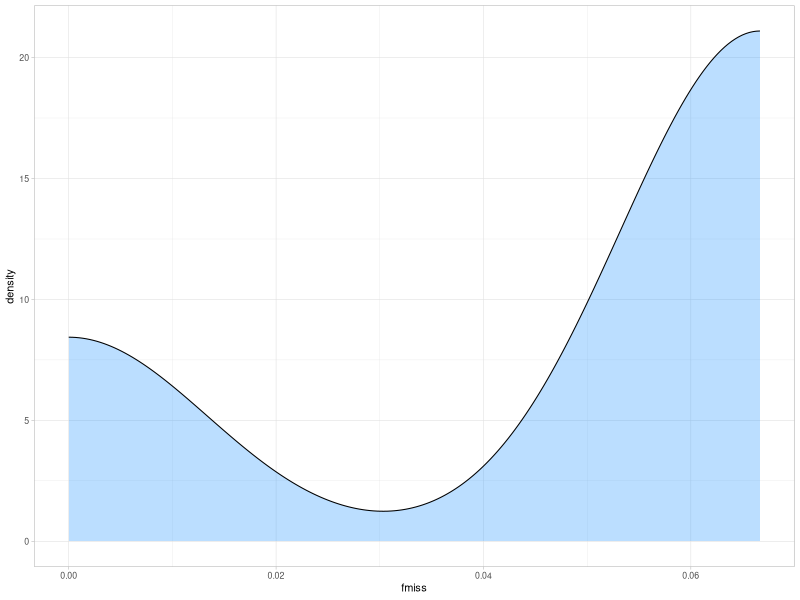

     chr           
 Length:35         
 Class :character  
 Mode  :character  
                   
                   
                   
      pos          
 Min.   : 1164179  
 1st Qu.:19463138  
 Median :36030281  
 Mean   :36223782  
 3rd Qu.:55197112  
 Max.   :68717945  
      nchr   
 Min.   :30  
 1st Qu.:30  
 Median :30  
 Mean   :30  
 3rd Qu.:30  
 Max.   :30  
   nfiltered
 Min.   :0  
 1st Qu.:0  
 Median :0  
 Mean   :0  
 3rd Qu.:0  
 Max.   :0  
     nmiss      
 Min.   :0.000  
 1st Qu.:0.000  
 Median :2.000  
 Mean   :1.429  
 3rd Qu.:2.000  
 Max.   :2.000  
     fmiss        
 Min.   :0.00000  
 1st Qu.:0.00000  
 Median :0.06667  
 Mean   :0.04762  
 3rd Qu.:0.06667  
 Max.   :0.06667  

In [48]:
# Variant missingness
var_miss <- read_delim(
  "ProjTaxa_Stats.lmiss",
  delim = "\t",
  col_names = c("chr", "pos", "nchr", "nfiltered", "nmiss", "fmiss"),
  skip = 1
)
ggplot(var_miss, aes(fmiss)) +
  geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3) +
  theme_light()
summary(var_miss)

Rows: 35 Columns: 6
── Column specificati
Delimiter: "\t"
chr (1): chr
dbl (5): pos, nal...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


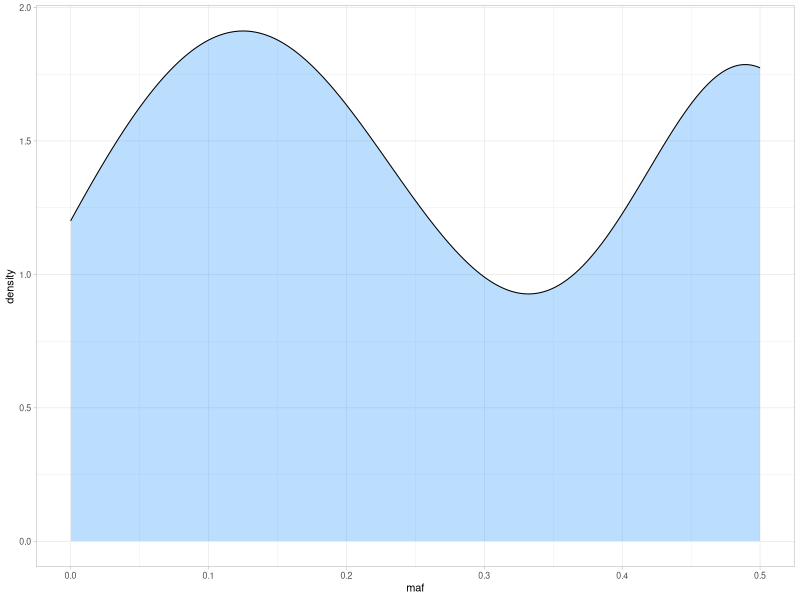

In [49]:
# Minor allele frequency
var_freq <- read_delim(
  "ProjTaxa_Stats.frq",
  delim = "\t",
  col_names = c("chr", "pos", "nalleles", "nchr", "a1", "a2"),
  skip = 1
)
var_freq$maf <- var_freq %>% select(a1, a2) %>% apply(1, function(z) min(z))
ggplot(var_freq, aes(maf)) +
  geom_density(fill = "dodgerblue1", colour = "black", alpha = 0.3) +
  theme_light()


Rows: 15 Columns: 3
── Column specificati
Delimiter: "\t"
chr (1): ind
dbl (2): nsites, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


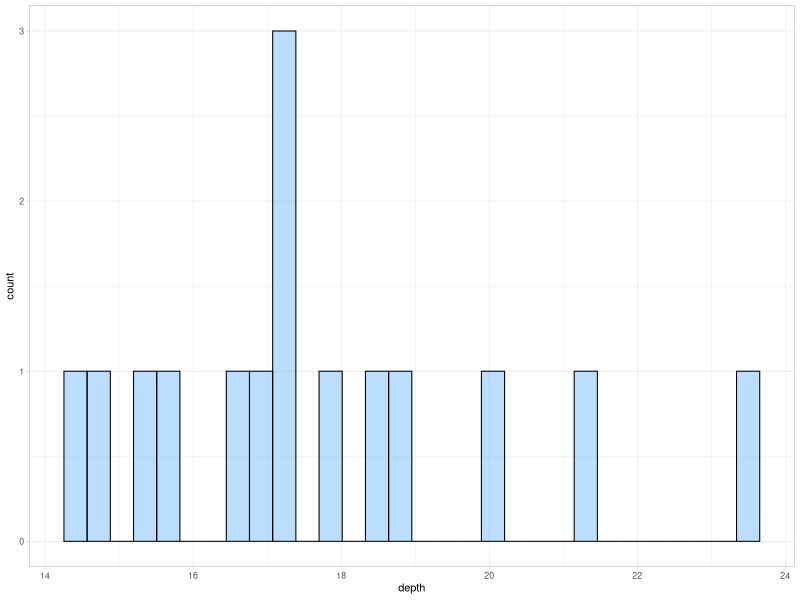

`stat_bin()` using
`bins = 30`. Pick
better value with
`binwidth`.

In [50]:
# Mean depth per individual
ind_depth <- read_delim(
  "ProjTaxa_Stats.idepth",
  delim = "\t",
  col_names = c("ind", "nsites", "depth"),
  skip = 1
)
ggplot(ind_depth, aes(depth)) +
  geom_histogram(fill = "dodgerblue1", colour = "black", alpha = 0.3) +
  theme_light()

Rows: 15 Columns: 5
── Column specificati
Delimiter: "\t"
chr (1): ind
dbl (4): ndata, n...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


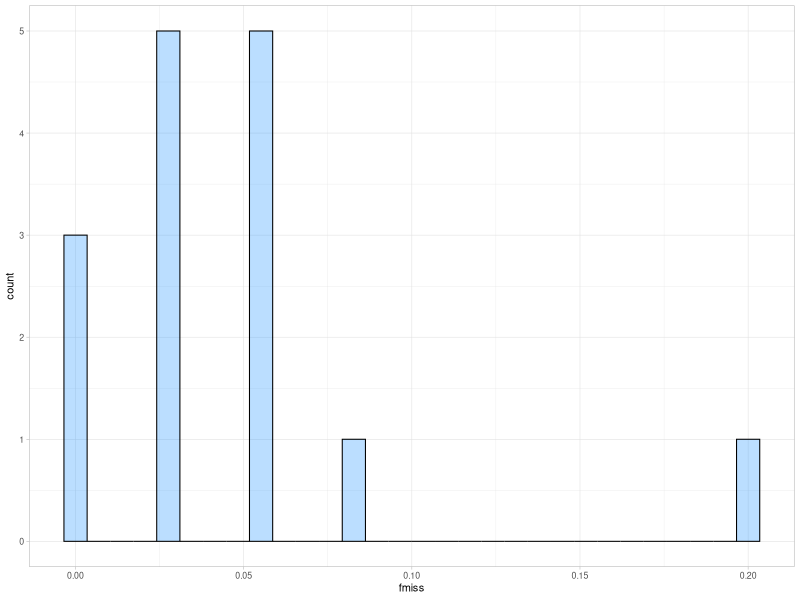

`stat_bin()` using
`bins = 30`. Pick
better value with
`binwidth`.

In [51]:
# Proportion of missing data per individual
ind_miss  <- read_delim(
  "ProjTaxa_Stats.imiss",
  delim = "\t",
  col_names = c("ind", "ndata", "nfiltered", "nmiss", "fmiss"),
  skip = 1
)
ggplot(ind_miss, aes(fmiss)) +
  geom_histogram(fill = "dodgerblue1", colour = "black", alpha = 0.3) + 
  theme_light()

Rows: 15 Columns: 5
── Column specificati
Delimiter: "\t"
chr (1): ind
dbl (4): ho, he, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


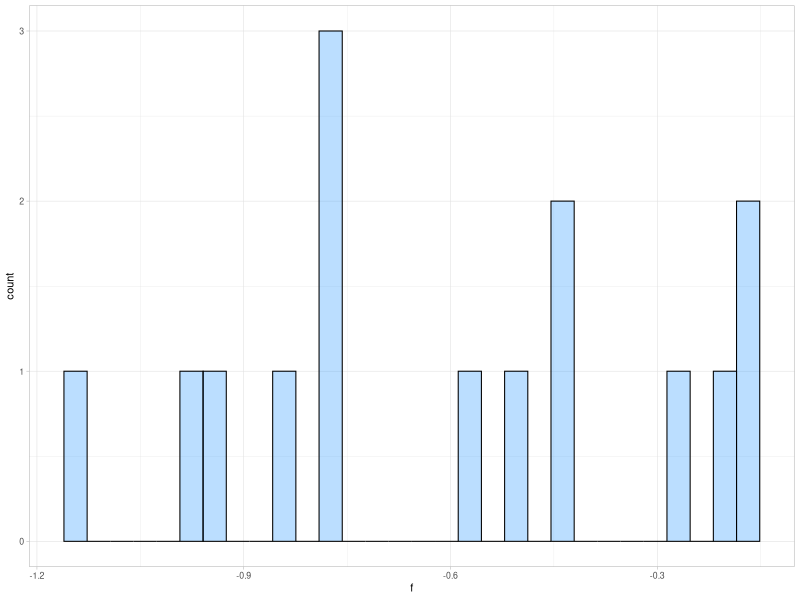

`stat_bin()` using
`bins = 30`. Pick
better value with
`binwidth`.

In [52]:
# Heterozygosity and inbreeding coefficient per individual
ind_het <- read_delim(
  "ProjTaxa_Stats.het",
  delim = "\t",
  col_names = c("ind","ho", "he", "nsites", "f"),
  skip = 1
)
ggplot(ind_het, aes(f)) +
  geom_histogram(fill = "dodgerblue1", colour = "black", alpha = 0.3) +
  theme_light()